In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 데이터 이해 및 탐색

In [3]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [4]:
names = iris["target_names"].tolist()
df['target'] = df['target'].map({0: names[0], 1: names[1], 2: names[2]})
names

['setosa', 'versicolor', 'virginica']

In [5]:
# 데이터 샘플
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
# 데이터 요약
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [7]:
# 클래스 분포
df['target'].value_counts()

target
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

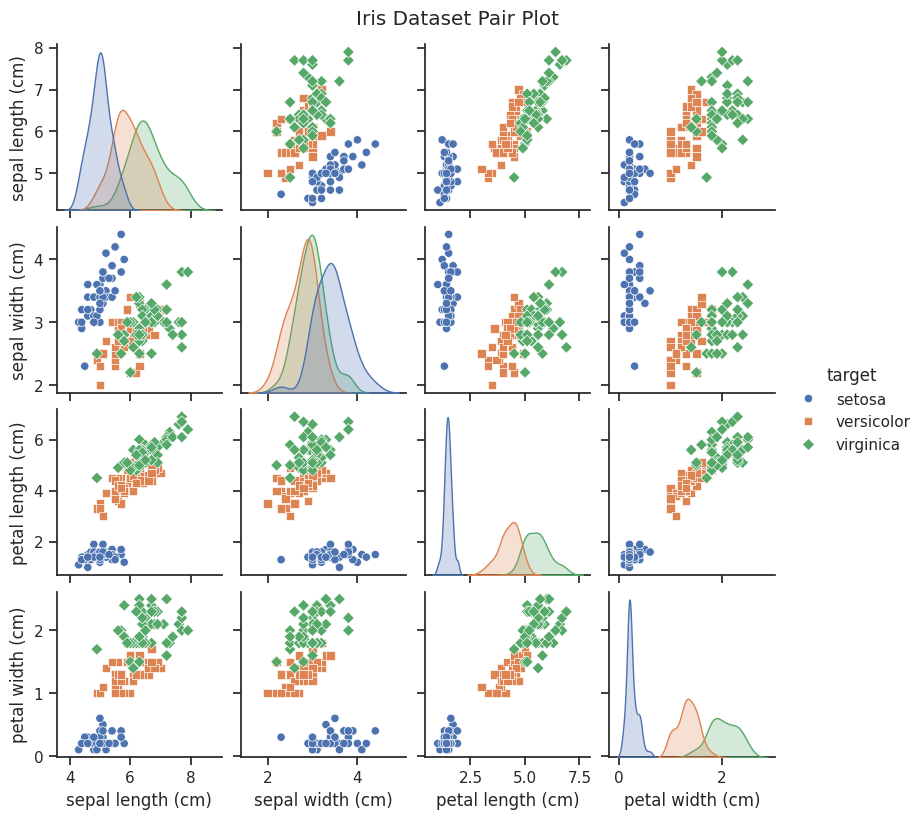

In [8]:
sns.set(style="ticks")
sns.pairplot(df, hue='target', markers=["o", "s", "D"], height=2, aspect=1)
plt.suptitle("Iris Dataset Pair Plot", y=1.02)  # 그래프 제목 추가
plt.show()

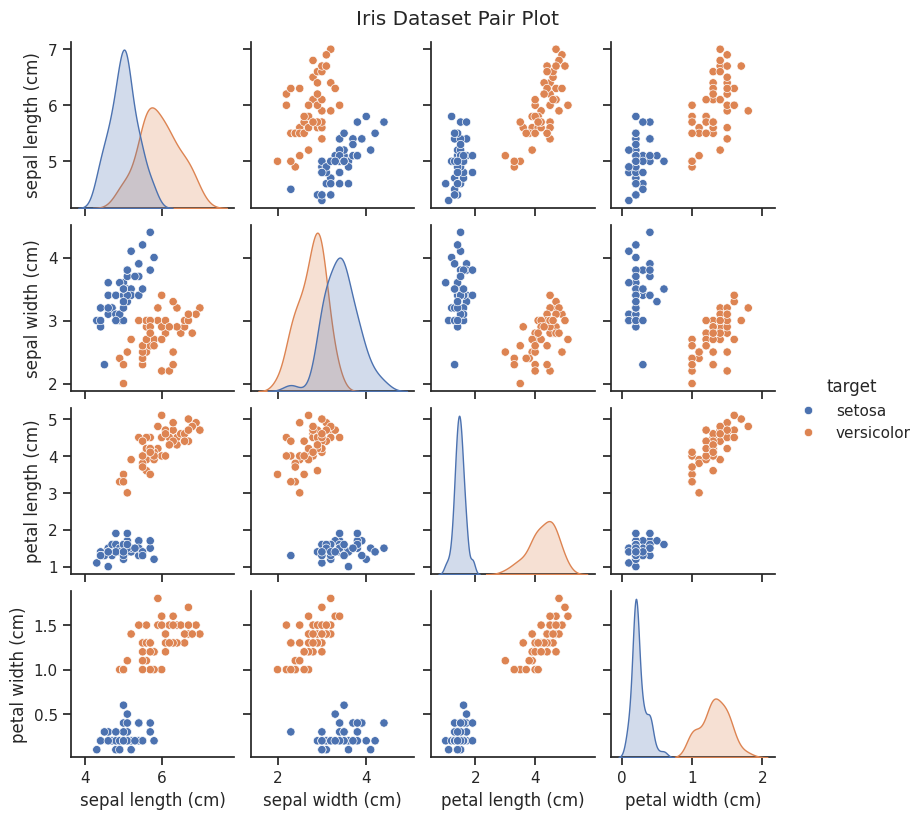

In [9]:
filtered_df = df[df['target'].isin(["setosa", "versicolor"])]
sns.set(style="ticks")
sns.pairplot(filtered_df, hue='target', height=2, aspect=1)
plt.suptitle("Iris Dataset Pair Plot", y=1.02)  # 그래프 제목 추가
plt.show()

# 데이터 전처리

In [10]:
# 결측치 확인
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [11]:
# 피처 이름 정리 (공백 제거)
df.columns = [col.replace(" (cm)", "").replace(" ", "_") for col in df.columns]

In [12]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# 피처 엔지니어링

In [13]:
# 예: petal 길이와 너비의 비율 추가
df['petal_ratio'] = df['petal_length'] / df['petal_width']
df['sepal_ratio'] = df['sepal_length'] / df['sepal_width']

# 데이터 분할 (데이터, 레이블)

In [14]:
X = df.drop('target', axis=1)
y = df['target']

In [26]:
X.shape, y.shape

((150, 6), (150,))

# 표준화

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
pd.DataFrame(X_scaled).describe().T

,count,mean,std,min,25%,50%,75%,max
0,150.0,-4.736952e-16,1.00335,-1.870024,-0.900681,-0.052506,0.674501,2.492019
1,150.0,-7.815970e-16,1.00335,-2.433947,-0.592373,-0.131979,0.558611,3.090775
2,150.0,-4.263256e-16,1.00335,-1.567576,-1.226552,0.336478,0.762758,1.785832
3,150.0,-4.736952e-16,1.00335,-1.447076,-1.183812,0.132510,0.790671,1.712096
4,150.0,4.736952e-17,1.00335,-0.880776,-0.607785,-0.407240,0.143538,4.307962
5,150.0,5.684342e-16,1.00335,-1.717149,-1.020920,0.196949,0.679530,2.525054


In [27]:
X_scaled.shape

(150, 6)

# 훈련/검증 세트 분할

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [30]:
X_train.shape, y_train.shape

((120, 6), (120,))

In [31]:
X_test.shape, y_test.shape

((30, 6), (30,))

# 모델링

In [19]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 성능 평가

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



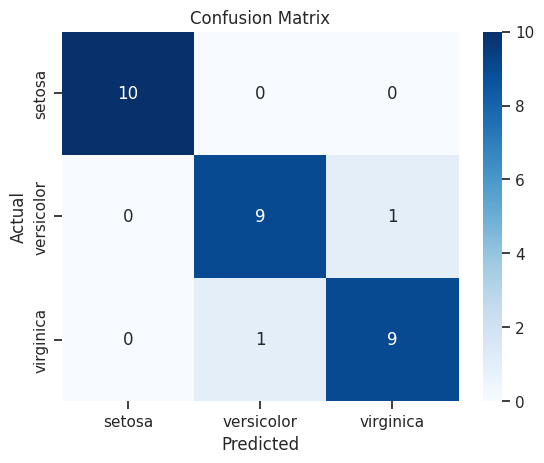

In [21]:
# 혼동 행렬
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', 
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()